<a href="https://colab.research.google.com/github/ripunjaysingh88/Vectorized_K_means_Numpy/blob/main/Implementing_K_means_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
#numpy brodcasting is used
#sigma * np.random.randn(...) + mu
array_1 = np.array([4,3]) + np.random.randn(200,2)
array_2 = np.array([-1,1]) + np.random.randn(200,2)
array_3 = np.array([-5,3]) + np.random.randn(200,2)
data = np.concatenate((array_1, array_2, array_3), axis=0)
print(data.shape)
data[:10]

(600, 2)


array([[1.21056582, 4.01709432],
       [4.35493709, 1.95066855],
       [4.84356662, 1.87275207],
       [3.5807071 , 2.9305522 ],
       [2.47789568, 4.42001481],
       [4.8890065 , 3.33958199],
       [4.0066333 , 3.45637011],
       [2.68267487, 3.53209532],
       [2.5406635 , 3.07640006],
       [3.36511802, 2.65239932]])

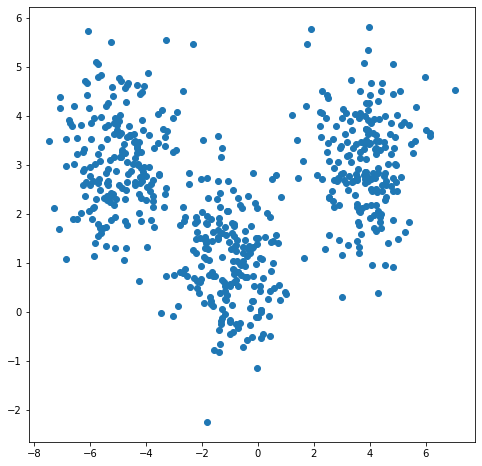

In [58]:
plt.figure(figsize=(8,8))
plt.scatter(data[: , 0], data[:,1])

In [59]:
def intialize_centriod(data, k):
  centriod = np.copy(data)
  np.random.shuffle(centriod)
  return centriod[:k]

In [60]:
centriod = intialize_centriod(data, 3)
centriod.shape

(3, 2)

In [61]:
centriod

array([[-2.79047269,  1.77421376],
       [-5.88102706,  3.95803244],
       [-1.29658795,  1.60792725]])

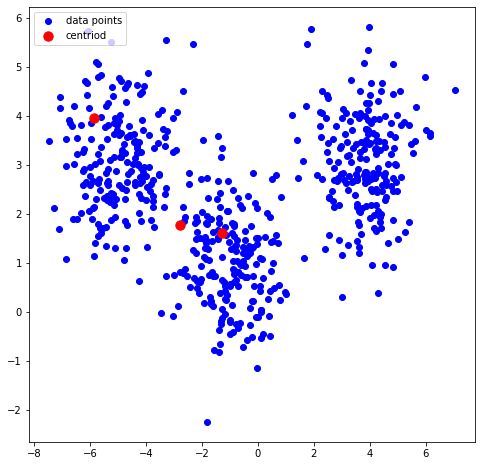

In [62]:
plt.figure(figsize=(8,8))
plt.scatter(data[: , 0], data[:,1], c = 'blue', label = 'data points')
plt.scatter(centriod[:,0], centriod[:,1], c = 'red' , s = 88 , label = 'centriod')
plt.legend(loc = "upper left")
plt.show()

In [63]:
def closest_centriod(centriod, data):
  euclidean_distance = np.sqrt(((data - centriod[:,np.newaxis])**2).sum(axis=2))
  return np.argmin(euclidean_distance,axis=0)

In [64]:
centriod_index = closest_centriod(centriod,data)
centriod_index.shape

(600,)

In [65]:
centriod_index[:300]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
#centriod_index==0 # we use this boolean array to access data points from "data".

In [66]:
def moving_centriod(centriod_index,data, k):
  new_centriod = np.array([data[centriod_index==index].mean(axis=0) for index in range(k)])
  return new_centriod

In [67]:
new_centriod = moving_centriod(centriod_index,data, centriod.shape[0])
new_centriod.shape

(3, 2)

In [68]:
new_centriod

array([[-3.32557608,  2.19257239],
       [-5.38954826,  3.26827169],
       [ 1.7016327 ,  2.09715212]])

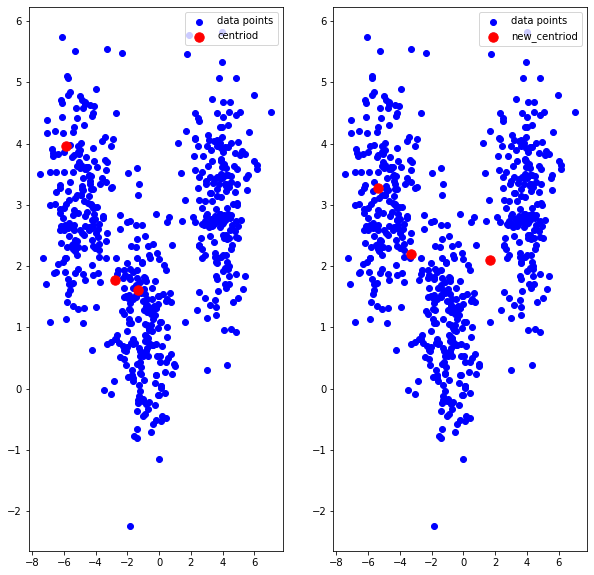

In [69]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.scatter(data[: , 0], data[:,1], c = 'blue', label = 'data points')
plt.scatter(centriod[:,0], centriod[:,1], c = 'red' , s = 88 , label = 'centriod')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.scatter(data[: , 0], data[:,1], c = 'blue', label = 'data points')
plt.scatter(new_centriod[:,0], new_centriod[:,1], c = 'red' , s = 88 , label = 'new_centriod')
plt.legend(loc='upper right')

plt.show()


[[ 0.79182131  2.12160325]
 [-5.42329594  3.21142136]
 [-4.88247447  5.60315224]]


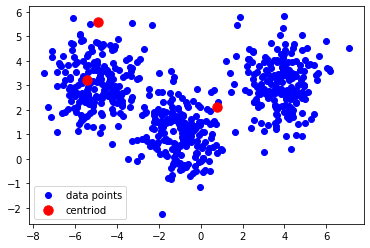

[[ 1.52974367  2.06968417]
 [-4.90131162  2.76842096]
 [-4.56472778  4.76868593]]


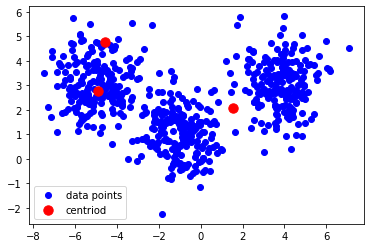

[[ 1.87477638  2.13312609]
 [-4.40941292  2.38165608]
 [-4.73454182  4.39155577]]


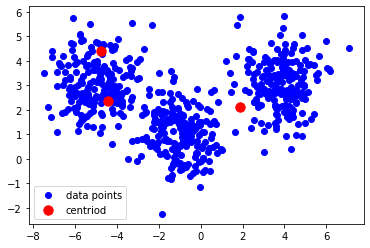

[[ 2.200149    2.22251245]
 [-3.75834005  2.01031164]
 [-5.10312851  4.09019191]]


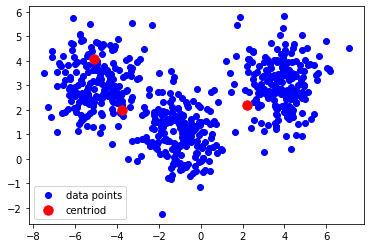

[[ 2.74575692  2.46649264]
 [-2.7065493   1.5816619 ]
 [-5.32680641  3.60773902]]


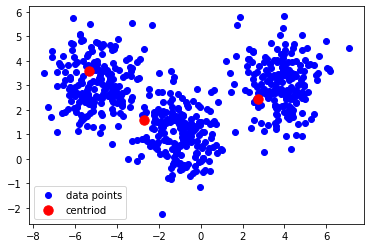

[[ 3.51078934  2.87625569]
 [-1.51745709  1.17484972]
 [-5.16751532  3.2461216 ]]


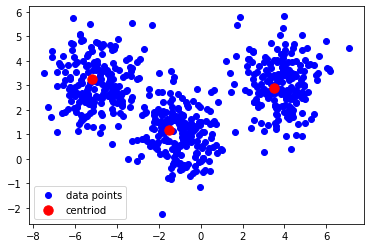

[[ 3.81925029  3.06167171]
 [-1.02924382  1.04056334]
 [-5.00307324  3.12528878]]


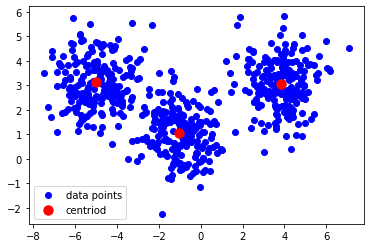

[[ 3.83015709  3.0715454 ]
 [-1.00456355  1.03544005]
 [-4.99478145  3.12029657]]


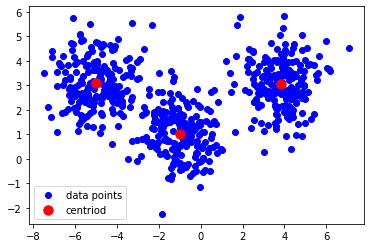

In [70]:
centriod = intialize_centriod(data, 3)

for i in range(8):
  centriod_index = closest_centriod(centriod,data)
  centriod = moving_centriod(centriod_index,data, centriod.shape[0])
  print(centriod)
  plt.scatter(data[: , 0], data[:,1], c = 'blue', label = 'data points')
  plt.scatter(centriod[:,0], centriod[:,1], c = 'red' , s = 88 , label = 'centriod')
  plt.legend()
  plt.show()
